## DWC_3

In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# remove future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = pd.read_csv('./data_03/wyp_2018_prepared.csv')

In [21]:
data.head(3)

,bike_num,start_time,end_time,departure,return,duration_sec,start_day,start_month,start_hour,start_minute,...,is_free,shop,route,dep_id,dep_lat,dep_lon,ret_id,ret_lat,ret_lon,distance
0,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,1,4,0,10,...,1,0,Murapol Mariacka - KTBS – Krasińskiego 14,5880,50.257215,19.028645,5883,50.255163,19.037121,0.646092
1,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247,1,4,0,16,...,1,0,Murapol Mariacka - KTBS – Krasińskiego 14,5880,50.257215,19.028645,5883,50.255163,19.037121,0.646092
2,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449,1,4,10,34,...,1,0,KTBS – Krasińskiego 14 - Katowice Rynek,5883,50.255163,19.037121,5867,50.258697,19.021618,1.173327


In [22]:
data.columns

Index(['bike_num', 'start_time', 'end_time', 'departure', 'return',
       'duration_sec', 'start_day', 'start_month', 'start_hour',
       'start_minute', 'month_day', 'duration_min', 'duration_hour',
       'which_day', 'daynumber', 'is_weekend', 'is_free', 'shop', 'route',
       'dep_id', 'dep_lat', 'dep_lon', 'ret_id', 'ret_lat', 'ret_lon',
       'distance'],
      dtype='object')

In [23]:
data = data.drop(columns = ['bike_num', 'start_time', 'end_time', 'departure', 'return',
       'start_hour', 'start_minute', 'duration_min', 'duration_hour',
       'which_day', 'route', 'dep_id', 'dep_lat', 'dep_lon', 'ret_id', 'ret_lat', 'ret_lon'])

In [24]:
data.head(3)

,duration_sec,start_day,start_month,month_day,daynumber,is_weekend,is_free,shop,distance
0,600,1,4,2018-04-01,91,1,1,0,0.646092
1,247,1,4,2018-04-01,91,1,1,0,0.646092
2,449,1,4,2018-04-01,91,1,1,0,1.173327


Utworzenie osobnego `Series` *(One-dimensional ndarray with axis labels (including time series))* 
zawierającego informacjo o liczbie wypożyczeń w ciągu danego dnia

In [25]:
sums = data.groupby('month_day').count().iloc[:,0]
sums.name = 'rental_sum'
sums

month_day
2018-04-01     44
2018-04-02    249
2018-04-03    476
2018-04-04    510
2018-04-05    629
             ... 
2018-12-12     79
2018-12-13     42
2018-12-14     65
2018-12-15     50
2018-12-16     26
Name: rental_sum, Length: 260, dtype: int64

Usunięcie dupikatów (jeden dzień - jeden wiersz).
pomiędzy datą `1 kwietnia 2018` r. (niedziela) a datą `16 grudnia 2018` r. (niedziela) jest `259` dni co stanowi 8 miesięcy i 15 dni.

In [26]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169536 entries, 0 to 171399
Data columns (total 9 columns):
duration_sec    169536 non-null int64
start_day       169536 non-null int64
start_month     169536 non-null int64
month_day       169536 non-null object
daynumber       169536 non-null int64
is_weekend      169536 non-null int64
is_free         169536 non-null int64
shop            169536 non-null int64
distance        169536 non-null float64
dtypes: float64(1), int64(7), object(1)
memory usage: 12.9+ MB


Połaczenie `data` DataFrame z `Sums` 

In [27]:
data = pd.merge(data,sums,on='month_day')
data.head(3)

,duration_sec,start_day,start_month,month_day,daynumber,is_weekend,is_free,shop,distance,rental_sum
0,600,1,4,2018-04-01,91,1,1,0,0.646092,44
1,247,1,4,2018-04-01,91,1,1,0,0.646092,44
2,449,1,4,2018-04-01,91,1,1,0,1.173327,44


In [28]:
data.index = data['month_day']

Wczytanie danych o pogodzie

In [29]:
pogoda = pd.read_csv('./data_03/weather.csv')
data = pd.merge(data,pogoda, on='daynumber')
data = data.drop(columns=['Unnamed: 0'])

In [30]:
data.sample(3)

,duration_sec,start_day,start_month,month_day,daynumber,is_weekend,is_free,shop,distance,rental_sum,dayofweek,mintemp,maxtemp,rain,meantemp,dewp,visib,mxpsd,sndp,fog
67204,1069,17,6,2018-06-17,168,1,0,0,1.749597,1187,1,57.2,78.8,0.0,68.6,53.4,5.147649,11.1,0.0,0
46029,334,28,5,2018-05-28,148,0,0,2,0.969413,952,2,57.2,80.6,0.0,71.4,50.4,5.147649,15.0,0.0,0
124315,756,21,8,2018-08-21,233,0,0,2,0.799514,1065,3,53.6,79.0,0.0,66.6,55.5,7.200000,11.1,0.0,0


In [31]:
data.columns

Index(['duration_sec', 'start_day', 'start_month', 'month_day', 'daynumber',
       'is_weekend', 'is_free', 'shop', 'distance', 'rental_sum', 'dayofweek',
       'mintemp', 'maxtemp', 'rain', 'meantemp', 'dewp', 'visib', 'mxpsd',
       'sndp', 'fog'],
      dtype='object')

In [32]:
data['meantemp'].max()

79.5

`meantemp` - Mean temperature for the day in degrees Fahrenheit to tenths.

`maxtemp` - Maximum temperature reported during the day in Fahrenheit to tenths--time of max temp report varies by country and region, so this will sometimes not be the max for the calendar day.

`mintemp` - Minimum temperature reported during the day in Fahrenheit to tenths--time of min temp report varies by country and region, so this will sometimes not be the min for the calendar day.

`dewp`- Mean dew point for the day in degreesm Fahrenheit to tenths.

`visib` - Mean visibility for the day in miles to tenths.

`mxpsd` - Maximum sustained wind speed reported for the day in knots to tenths.

`sndp` - Snow depth in inches to tenths--last report for the day if reported more thanonce. Missing = 999.9 Note: Most stations do not report '0' ondays with no snow on the ground--therefore, '999.9' will often appear on these days

`prcp` - Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; will usually not end with the midnight observation--i.e., may include latter part of previous day. .00 indicates no measurable precipitation (includes a trace). Missing = 99.99 Note: Many stations do not report '0' on days with no precipitation--therefore, '99.99' will often appear on these days. Also, for example, a station may only report a 6-hour amount for the period during which rain fell. See Flag field for source of data

`fog` - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day


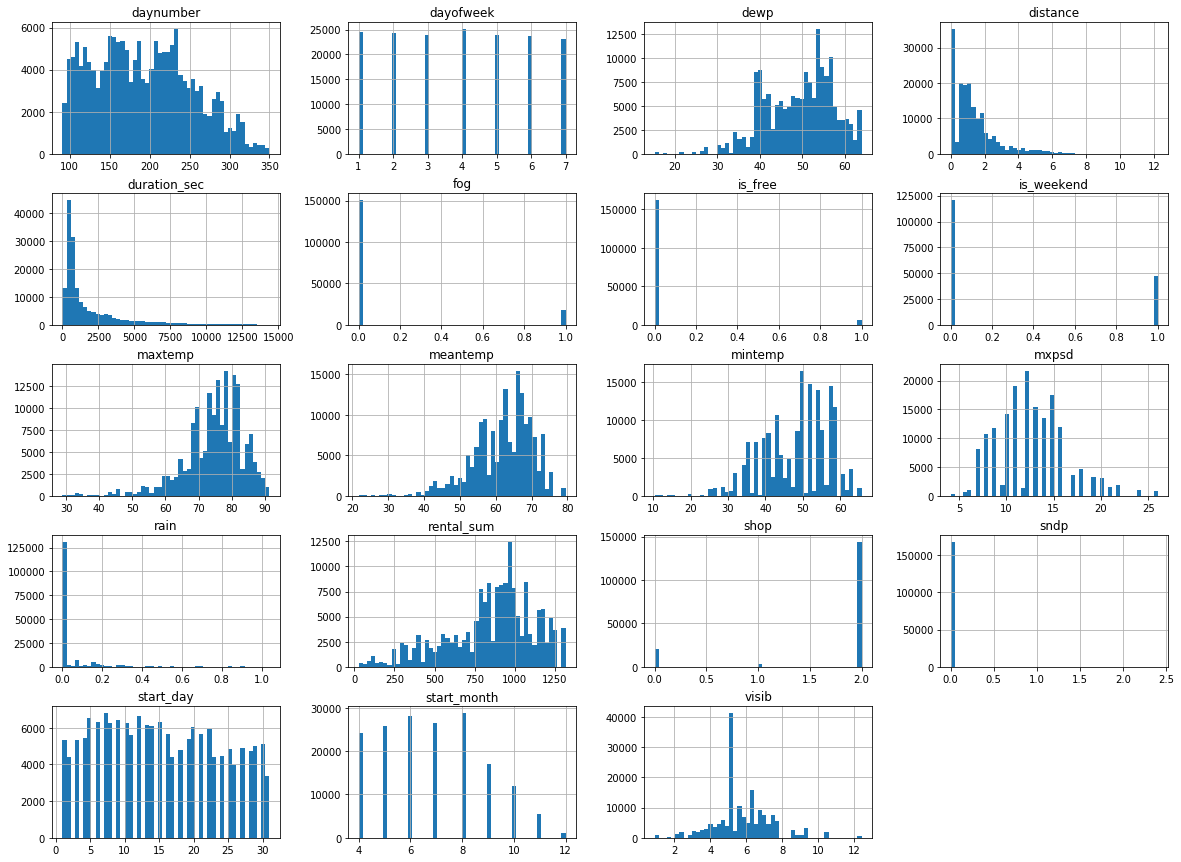

In [33]:
#%matplotlib inline
#import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

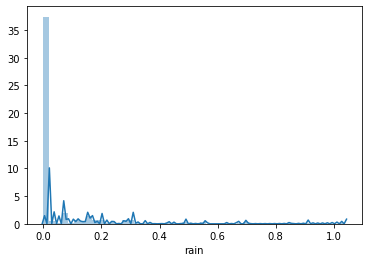

In [35]:
sns.distplot(data['rain']);

In [15]:
data['rain'] = data['rain'].apply(lambda x: 0 if x <= 0.1 else 1)

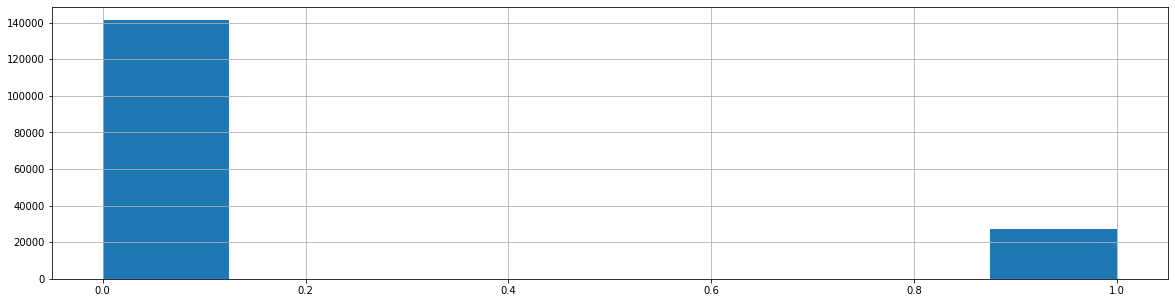

In [106]:
data['rain'].hist(bins=8,figsize=(20,5))
plt.show()

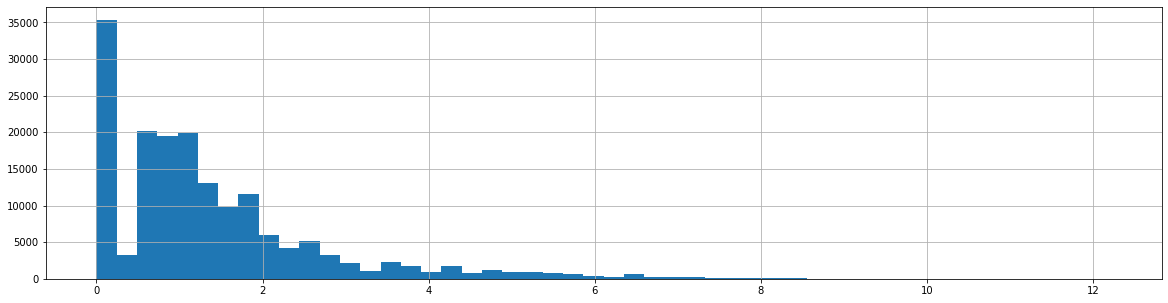

In [107]:
data['distance'].hist(bins=50,figsize=(20,5))
plt.show()

### duration_sec

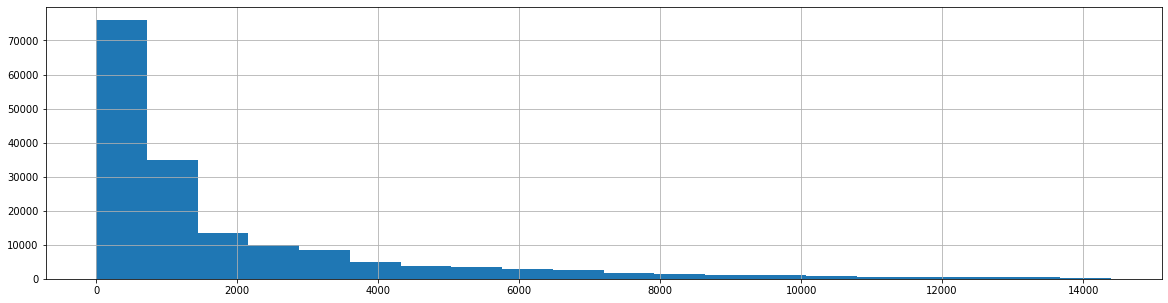

In [108]:
data['duration_sec'].hist(bins=20,figsize=(20,5))
plt.show()

### daynumber

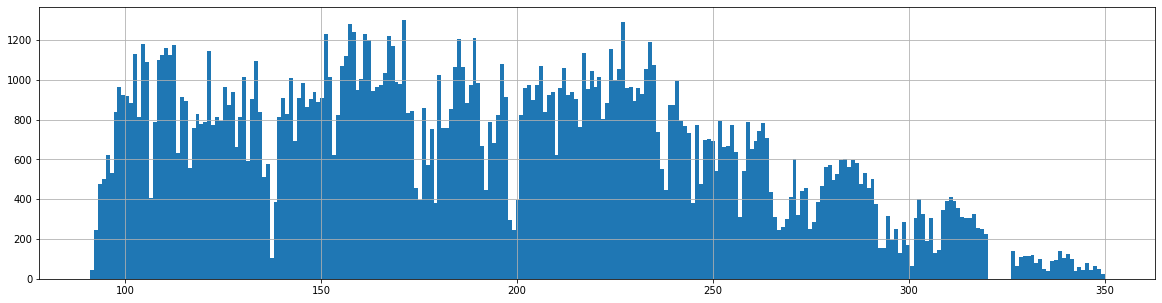

In [109]:
data['daynumber'].hist(bins=260,figsize=(20,5))
plt.show()

In [110]:
# missing 6 values!
data['daynumber'].nunique()

254

### dayofweek

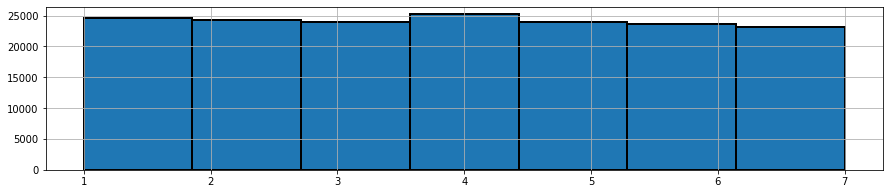

In [111]:
data['dayofweek'].hist(bins=7,linewidth=2,edgecolor='black',figsize=(15,3))
plt.show()

### dewp

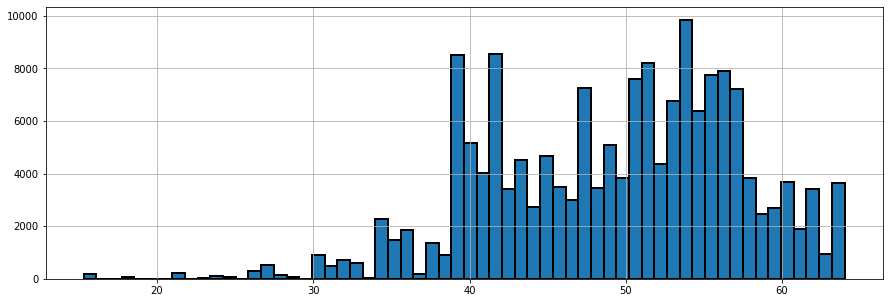

In [112]:
data['dewp'].hist(bins=60,linewidth=2,edgecolor='black',figsize=(15,5))
plt.show()

### fog

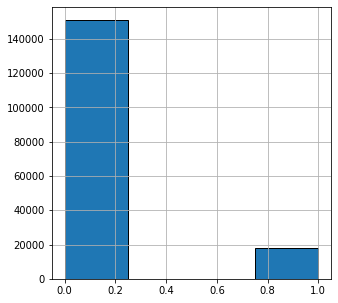

In [113]:
data['fog'].hist(bins=4,edgecolor='black',figsize=(5,5))
plt.show()

### Temperature

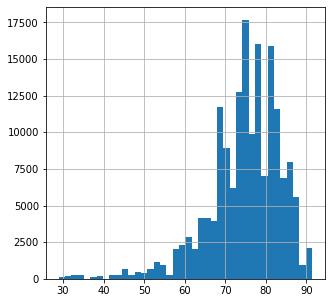

In [114]:
data['maxtemp'].hist(bins=40,figsize=(5,5))
plt.show()

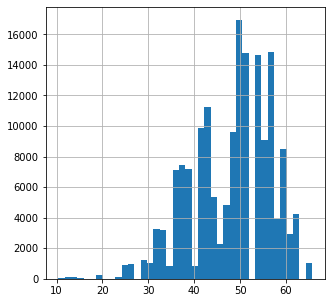

In [115]:
data['mintemp'].hist(bins=40,figsize=(5,5))
plt.show()

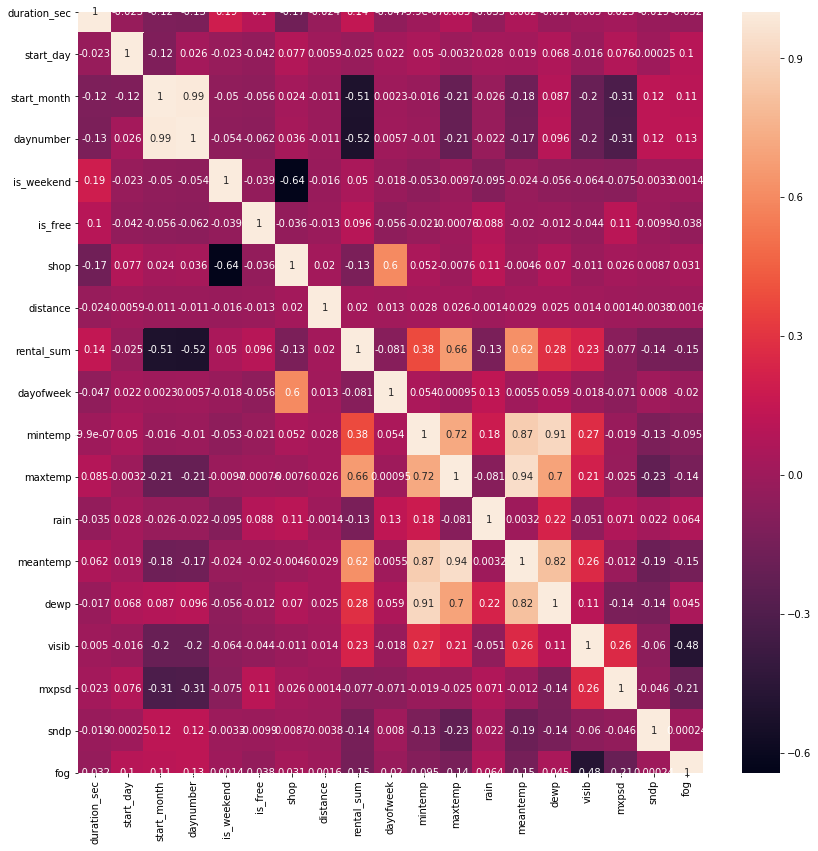

In [116]:
corr_matrix = data.corr()
import seaborn as sns

plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, annot = True);

### Średnia liczba wypożyczeń na dzień

In [117]:
data['rental_sum'].mean()

853.7263747001865

In [118]:
data.columns

Index(['duration_sec', 'start_day', 'start_month', 'month_day', 'daynumber',
       'is_weekend', 'is_free', 'shop', 'distance', 'rental_sum', 'dayofweek',
       'mintemp', 'maxtemp', 'rain', 'meantemp', 'dewp', 'visib', 'mxpsd',
       'sndp', 'fog'],
      dtype='object')

In [119]:
data = data.drop(columns = ['daynumber', 'dewp', 'month_day', 'mintemp', 'maxtemp', 'mxpsd', 'fog'])

In [120]:
# bikes - Dataframe z usuniętą kolumną rental_sum
bikes = data.drop("rental_sum", axis=1)

# bikes_labels - koluma z wypożyczeniami
bikes_labels = data["rental_sum"].copy()

In [121]:
#type(bikes_labels)
bikes.sample(2)

,duration_sec,start_day,start_month,is_weekend,is_free,shop,distance,dayofweek,rain,meantemp,visib,sndp
151458,391,4,10,0,0,2,3.224846,5,0,45.9,5.9,0.0
64235,716,14,6,0,0,2,2.626181,5,0,61.8,6.4,0.0


### train_test_split

`X_train, X_test, y_train, y_test = train_test_split(your_data, y, test_size=0.2, random_state=123)`

X_train: this will be your training group

X_test: this will be your test group

Y_train: this will be your target for your training group

Y_test: as you can imagine, this will be your target for your test group

In [122]:
from sklearn.model_selection import train_test_split
bikes_train, bikes_test, label_train, label_test = train_test_split(bikes,bikes_labels,test_size=0.28, random_state=1138)

In [123]:
print(bikes_train.shape, label_train.shape)
print(bikes_test.shape, label_test.shape)

(121575, 12) (121575,)
(47280, 12) (47280,)


In [124]:
bikes_train.shape

(121575, 12)

In [125]:
bikes_test.shape

(47280, 12)

In [126]:
bikes.columns

Index(['duration_sec', 'start_day', 'start_month', 'is_weekend', 'is_free',
       'shop', 'distance', 'dayofweek', 'rain', 'meantemp', 'visib', 'sndp'],
      dtype='object')

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#parametry dyskretne
cat_attribs = ['dayofweek', 'start_day','rain', 'start_month', 'is_weekend', 'is_free', 'shop']

#parametry ciągłe
num_attribs = ['meantemp', 'visib', 'sndp']

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [128]:
bikes_train_encoded = full_pipeline.fit_transform(bikes_train)

In [129]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(bikes_train_encoded, label_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
bikes_test_encoded = full_pipeline.fit_transform(bikes_test)

In [131]:
bikes_test_encoded.shape

(47280, 59)

In [132]:
bikes_train_encoded.shape

(121575, 59)

In [133]:
pred = lin_reg.predict(bikes_test_encoded)

In [134]:
from sklearn.metrics import mean_squared_error


lin_mse = mean_squared_error(label_test, pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

139.20630368453243

### Wyniki:
test_size=`0.4`, random_state=`1138` - `302.76077342369445`

test_size=`0.3`, random_state=`1138` - `254.7333534347016`

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

### Zapisanie danych 

In [75]:
data.to_csv('data.csv')